In [215]:
import numpy as np
import matplotlib.pyplot as plt
import math
vmax=100/3.6
g=9.81
m=57/1000
r=(67/1000)/2
A= math.pi*r**2
p=1.225
w= [0, 0, 100]

In [216]:
N=10000
tfinal=4
xt= np.empty(N)
yt= np.empty(N)
zt= np.empty(N)
xt[0]=-10
yt[0]=1
zt[0]=0
vxt= np.empty(N)
vyt= np.empty(N)
vzt= np.empty(N)
t= np.zeros(N)
vxt[0]=(130/3.6)*math.cos(math.radians(10))
vyt[0]=(130/3.6)*math.sin(math.radians(10))
vzt[0]=0
dt=tfinal/N
dragcoef=(g/vmax**2)
magcoef= (0.5*A*p*r)/m

In [217]:
def euler():
    for i in range(N-1):
        wvcross = np.cross(w, [vxt[i], vyt[i], vzt[i]]) #crossproduct of w and v
        vabs = np.sqrt(vxt[i]**2 + vyt[i]**2 + vzt[i]**2)
        
        ax=-dragcoef*vabs*vxt[i] + magcoef*wvcross[0]
        ay=-g -dragcoef*vabs*vyt[i] + magcoef*wvcross[1]
        az=-dragcoef*vabs*vzt[i] + magcoef*wvcross[2]
        
        xt[i+1]=xt[i]+vxt[i]*dt
        yt[i+1]=yt[i]+vyt[i]*dt
        zt[i+1]=zt[i]+vzt[i]*dt
        
        vxt[i+1]=vxt[i]+ax*dt
        vyt[i+1]=vyt[i]+ay*dt
        vzt[i+1]=vzt[i]+az*dt

        t[i+1]=t[i]+ dt
        if(vyt[i+1]*vyt[i]<0): #save when the vertical velocity changes from positive to negative, so we know when velocity 0 was crossed
            timevel0 = ((2*i+1)/2)*dt 
            vel0index= i
        if(yt[i+1]*yt[i]<0): #save when the y changes from positive to negative, so we know when y 0 was crossed
            timey0 = ((2*i+1)/2)*dt
            y0index = i
    return timevel0, vel0index, timey0, y0index
timevel0, vel0index, timey0, y0index = euler()

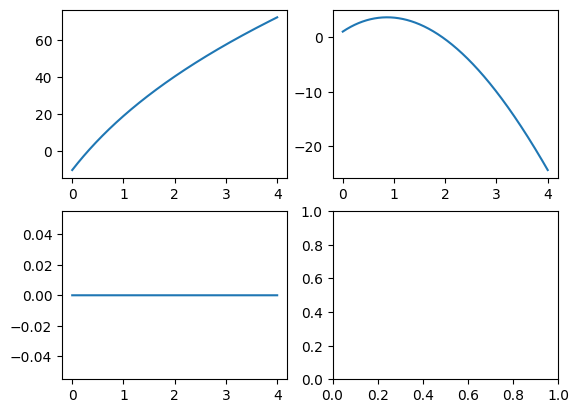

In [218]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(t, xt, linestyle="-")
axis[0, 1].plot(t, yt, linestyle="-")
axis[1, 0].plot(t, zt, linestyle="-")

In [219]:
print("A bola atinge a sua altura máxima aos {:.2f} segundos, atingindo os {:.2f} metros.".format(timevel0, yt[vel0index]))
print("A bola chega ao chão aos {:.2f} segundos, atingindo os {:.2f} metros.".format(timey0, xt[y0index]))

A bola atinge a sua altura máxima aos 0.86 segundos, atingindo os 3.62 metros.
A bola chega ao chão aos 1.94 segundos, atingindo os 39.24 metros.
